# <center>Robotics Coursework - Convolutional Neural Networks</center>

# 1: Load New Dataset

In [3]:
# importing of modules for LeNet CNN
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.optimizers.legacy import SGD, RMSprop, Adam

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf

# Load dataset
(x, y_indices), (x_test, y_test_indices) = tf.keras.datasets.cifar10.load_data()

In [5]:
# Flatten y_indices to 1D array if necessary
y_indices = y_indices.flatten()
y_test_indices = y_test_indices.flatten()

# 2: Data Preparation

In [6]:
# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train_indices, y_val_indices = train_test_split(x, y_indices, test_size=0.2, random_state=42)

In [7]:
# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train_indices, num_classes=10)
y_val_one_hot = to_categorical(y_val_indices, num_classes=10)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# Fit the generator to your training data
datagen.fit(x_train)

In [9]:
# Create TensorFlow datasets for training and validation
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train_one_hot)).shuffle(buffer_size=1024).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val_one_hot)).batch(32)

# 3: Model Setting up and Training

In [10]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Define the learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

# Initialize the optimizer with the learning rate schedule
optimizer = Adam(learning_rate=lr_schedule)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                        

In [12]:
history = model.fit(datagen.flow(x_train, y_train_one_hot, batch_size=32), epochs=10, validation_data=(x_val, y_val_one_hot))

Epoch 1/10
1250/1250 [==============================] - 78s 62ms/step - loss: 1.9400 - accuracy: 0.3341 - val_loss: 1.5167 - val_accuracy: 0.4659
Epoch 2/10
1250/1250 [==============================] - 79s 63ms/step - loss: 1.5768 - accuracy: 0.4284 - val_loss: 1.3856 - val_accuracy: 0.4865
Epoch 3/10
1250/1250 [==============================] - 79s 63ms/step - loss: 1.4527 - accuracy: 0.4785 - val_loss: 2.5643 - val_accuracy: 0.3121
Epoch 4/10
1250/1250 [==============================] - 82s 65ms/step - loss: 1.3675 - accuracy: 0.5160 - val_loss: 1.3411 - val_accuracy: 0.5460
Epoch 5/10
1250/1250 [==============================] - 80s 64ms/step - loss: 1.2917 - accuracy: 0.5413 - val_loss: 1.4462 - val_accuracy: 0.5215
Epoch 6/10
1250/1250 [==============================] - 80s 64ms/step - loss: 1.2382 - accuracy: 0.5634 - val_loss: 1.2434 - val_accuracy: 0.5661
Epoch 7/10
1250/1250 [==============================] - 80s 64ms/step - loss: 1.1867 - accuracy: 0.5856 - val_loss: 1.2842 -

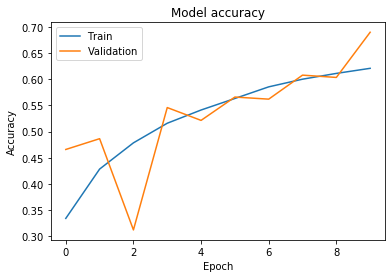

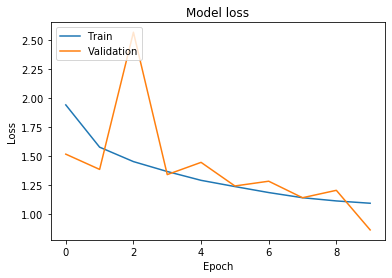

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = y_test_indices

# Predictions from the model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Getting the index of the max logit to get the predicted class

# Print shapes to confirm alignment
print("Shape of predicted classes:", y_pred_classes.shape)
print("Shape of true classes:", y_true.shape)

# Confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))

313/313 [==============================] - 4s 12ms/step
Shape of predicted classes: (10000,)
Shape of true classes: (10000,)
[[776  45  78   9   6   3  16  13  29  25]
 [ 10 914   7   4   1   3  14   1   7  39]
 [ 85   7 664  23  45  53 100   9   6   8]
 [ 21  16 114 379  62 178 189  17   9  15]
 [ 37   5 150  31 597  19 120  35   4   2]
 [ 12   7  90 117  47 641  51  24   4   7]
 [  3   4  74  19  13  11 872   1   1   2]
 [ 29   6  79  28 100  94  33 615   0  16]
 [130  62  28   8   9   6  16   1 714  26]
 [ 37 144  13   3   6   4  24   5  11 753]]
              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1000
           1       0.76      0.91      0.83      1000
           2       0.51      0.66      0.58      1000
           3       0.61      0.38      0.47      1000
           4       0.67      0.60      0.63      1000
           5       0.63      0.64      0.64      1000
           6       0.61      0.87      0.72      1000
           